Данная работа посвящена прогнозированию параметров вращения Земли (ПВЗ) методом полиномиальной регрессии на 7 дней.

Анализ научных работ показал, что написание математической модели является сложным и крайне не стабильным решением для данной задачи. В свою очередь, статистические методы являются наиболее подходящими и простыми, в числе которых прогнозирование на основе полиномиальной регрессии.

Данные взяты с https://www.iers.org/. 

In [1]:
import pandas as pd

import numpy as np

from matplotlib import pyplot as plt
import seaborn 
seaborn.set()

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [4]:
data = pd.read_csv('C:/Users/79653/absolut.csv', encoding='iso-8859-1', sep=';') 

In [5]:
data.head()

,MJD,Year,Month,Day,x_pole,y_pole,UT1-UTC
0,41683,1973,1,1,0.124800,0.125000,0.810594
1,41684,1973,1,2,0.123500,0.123000,0.807858
2,41685,1973,1,3,0.122300,0.121000,0.805152
3,41686,1973,1,4,0.120901,0.119001,0.802401
4,41687,1973,1,5,0.119601,0.117101,0.799542


In [6]:
data.shape

(14975, 7)

*Существует три параметра вращения Земли: *

Xp – угловая координата смещения оси полюса Земли;
Yp – угловая координата смещения оси полюса Земли;
ΔUT1 – разность между всеминрным астрономическим временем UT1 и всемирным координированным временем UTC.

Цифра указанная у параметра (переменной) обозначает количество дней на которые будет производиться прогнозирование.

Прогноз будет осуществляться относительно временного ряда. В данном случае относительно MJD - юлианская дата.


In [7]:
data.corr() 

,MJD,Year,Month,Day,x_pole,y_pole,UT1-UTC
MJD,1.000000,0.999703,0.024231,0.002373,0.149734,0.259683,-0.289790
Year,0.999703,1.000000,-0.000074,0.000085,0.141598,0.262577,-0.285098
Month,0.024231,-0.000074,1.000000,0.010556,0.336242,-0.114428,-0.193355
Day,0.002373,0.000085,0.010556,1.000000,0.005087,0.002019,-0.043474
x_pole,0.149734,0.141598,0.336242,0.005087,1.000000,0.030497,-0.129870
y_pole,0.259683,0.262577,-0.114428,0.002019,0.030497,1.000000,-0.073527
UT1-UTC,-0.289790,-0.285098,-0.193355,-0.043474,-0.129870,-0.073527,1.000000


In [8]:
#обзначение данных для прогнозирования на 7 дней

point = 14968 #номер позиции, с которой начинается прогнозирование

x_train_xp7 = data[['MJD', 'Month', 'Year', 'UT1-UTC']].iloc[:point,:]
y_train_xp7 = data['x_pole'].iloc[:point]
y_test_xp7 = data['x_pole'].iloc[point:]
x_test_xp7 = data[['MJD', 'Month', 'Year', 'UT1-UTC']].iloc[point:,:]

x_train_yp7 = data[['MJD', 'Year', 'Month']].iloc[:point,:]
y_train_yp7 = data['y_pole'].iloc[:point]
y_test_yp7 = data['y_pole'].iloc[point:]
x_test_yp7 = data[['MJD', 'Year', 'Month']].iloc[point:,:]

x_train_dut7 = data[['MJD', 'Month', 'Year', 'x_pole']].iloc[:point,:]
y_train_dut7 = data['UT1-UTC'].iloc[:point]
y_test_dut7 = data['UT1-UTC'].iloc[point:]
x_test_dut7 = data[['MJD', 'Month', 'Year', 'x_pole']].iloc[point:,:]

Далее следует раздел, где выбирается степень полинома и происходит обучение модели. 

In [9]:
model_y_x_7 = make_pipeline(StandardScaler(), PolynomialFeatures(10), LinearRegression())
model_y_y_7 = make_pipeline(StandardScaler(), PolynomialFeatures(10), LinearRegression())
model_y_dut_7 = make_pipeline(StandardScaler(), PolynomialFeatures(2), LinearRegression())

model_y_x_7.fit(x_train_xp7, y_train_xp7)
model_y_y_7.fit(x_train_yp7, y_train_yp7)
model_y_dut_7.fit(x_train_dut7, y_train_dut7)

y_x_7_train_prediction = model_y_x_7.predict(x_train_xp7)
y_x_7_test_prediction = model_y_x_7.predict(x_test_xp7)

y_y_7_train_prediction = model_y_y_7.predict(x_train_yp7)
y_y_7_test_prediction = model_y_y_7.predict(x_test_yp7)

y_dut_7_train_prediction = model_y_dut_7.predict(x_train_dut7)
y_dut_7_test_prediction = model_y_dut_7.predict(x_test_dut7)

Расчет ошибок

In [33]:
from sklearn.metrics import mean_absolute_error

'''print('Test Xp MAE: ', mean_absolute_error(y_test_xp7, y_x_7_test_prediction))
print('Test Yp MAE: ', mean_absolute_error(y_test_yp7, y_y_7_test_prediction))
print('Test dUT MAE: ', mean_absolute_error(y_test_dut7, y_x_7_test_prediction))'''

#абсолютная ошибка
mae_yx_7 = abs(y_test_xp7 - y_x_7_test_prediction)
mae_yy_7 = abs(y_test_yp7 - y_y_7_test_prediction)
mae_deltauu_7 = abs(y_test_dut7 - y_dut_7_test_prediction)

print(max(mae_yx_7))
print(max(mae_yy_7))
print(max(mae_deltauu_7), '\n')

#абсолютная ошибка в процентах
mae_yx_7_percent = abs((y_test_xp7 - y_x_7_test_prediction)/y_test_xp7)*100
mae_yy_7_percent = abs((y_test_yp7 - y_y_7_test_prediction)/y_test_yp7)*100
mae_deltauu_7_percent = abs((y_test_dut7 - y_dut_7_test_prediction)/y_test_dut7)*100

print('delta_Xp_7=', max(mae_yx_7_percent),'%')
print('delta_Yp_7=', max(mae_yy_7_percent),'%')
print('dealta_dU_7=', max(mae_deltauu_7_percent),'%')

0.014566084472656254
0.0011987847671509066
0.047424139599168885 

delta_Xp_7= 37.40456184237135 %
delta_Yp_7= 0.38374743257634125 %
dealta_dU_7= 49.467441748012284 %


Построение графиков

Text(0, 0.5, 'Xp')

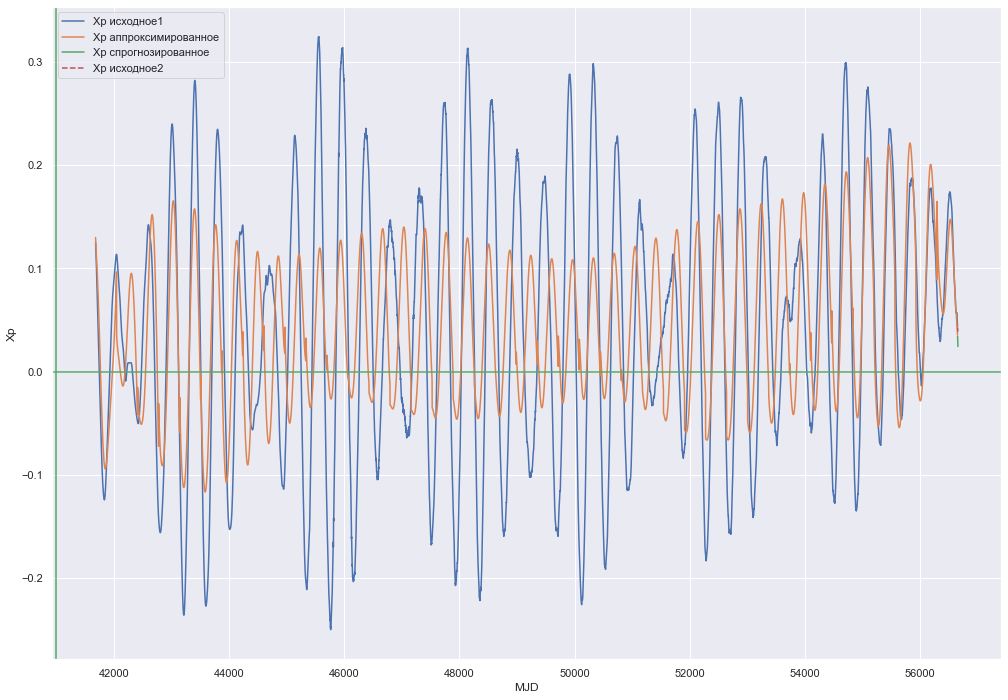

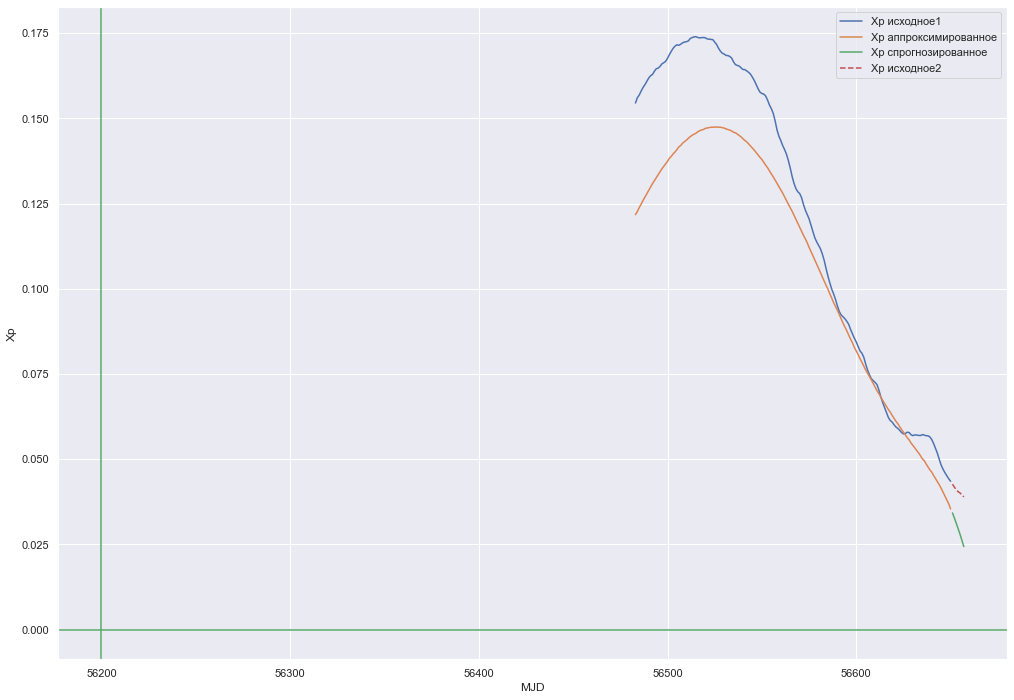

In [34]:
plt.figure(figsize=(17,12))
plt.figure(1,2)
plt.plot(x_train_xp7['MJD'], y_train_xp7, label = 'Xp исходное1')
plt.plot(x_train_xp7['MJD'], y_x_7_train_prediction, label = 'Xp аппроксимированное')
plt.plot(x_test_xp7['MJD'], y_x_7_test_prediction, label = 'Xp спрогнозированное')
plt.plot(x_test_xp7['MJD'],  y_test_xp7 ,'--', label = 'Xp исходное2')
plt.legend()

ax = plt.gca()
# plot X - axis    
ax.axhline(y=0, color='g')
# plot Y - axis    
ax.axvline(x=41000, color='g')
plt.xlabel("MJD")
plt.ylabel("Xp")

plt.figure(figsize=(17,12))
plt.plot(x_train_xp7['MJD'][14800:], y_train_xp7[14800:], label = 'Xp исходное1')
plt.plot(x_train_xp7['MJD'][14800:], y_x_7_train_prediction[14800:], label = 'Xp аппроксимированное')
plt.plot(x_test_xp7['MJD'], y_x_7_test_prediction, label = 'Xp спрогнозированное')
plt.plot(x_test_xp7['MJD'], y_test_xp7, '--r', label = 'Xp исходное2')
plt.legend()

axx = plt.gca()
# plot X - axis    
axx.axhline(y=0, color='g')
# plot Y - axis   
axx.axvline(x=56200, color='g')
plt.xlabel("MJD")
plt.ylabel("Xp")

Text(0, 0.5, 'Yp')

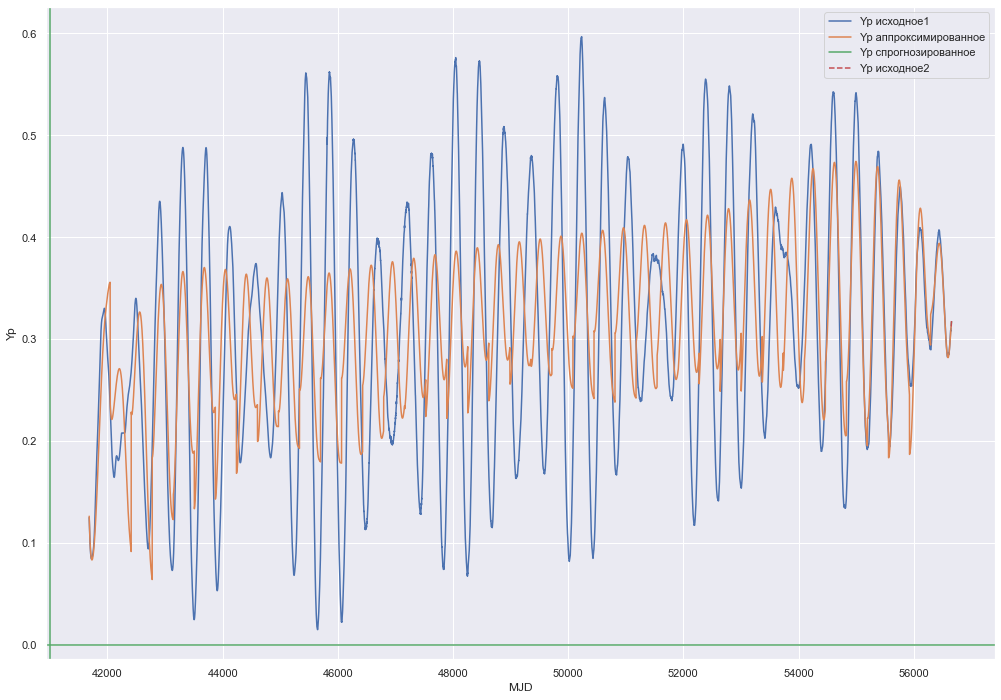

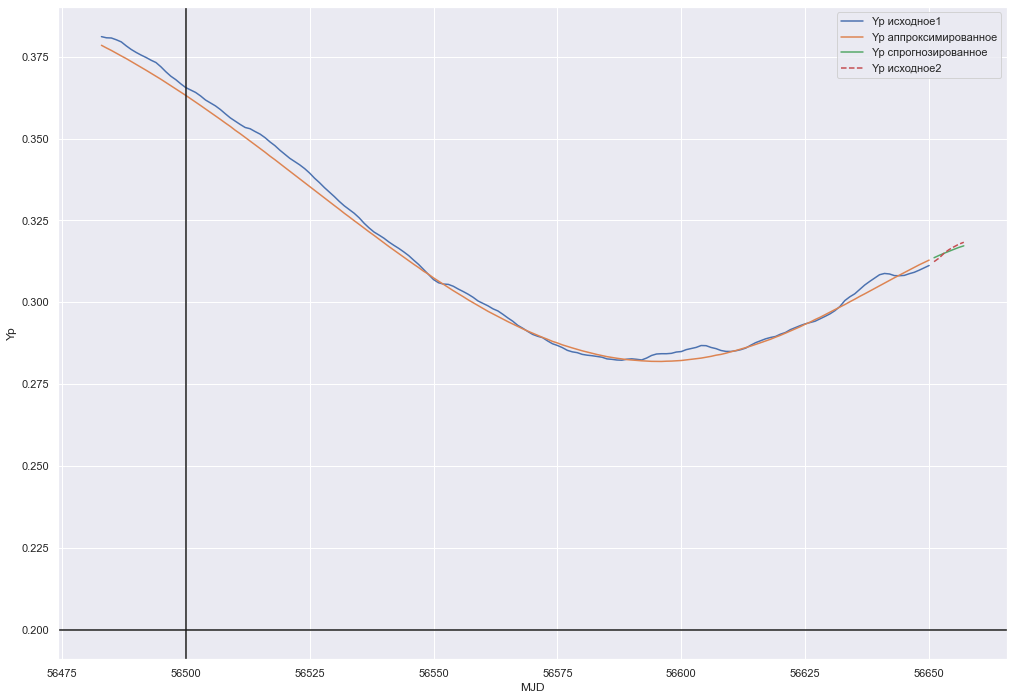

In [38]:
plt.figure(figsize=(17,12))
plt.figure(1,2)
plt.plot(x_train_yp7['MJD'], y_train_yp7, label = 'Yp исходное1')
plt.plot(x_train_yp7['MJD'], y_y_7_train_prediction, label = 'Yp аппроксимированное')
plt.plot(x_test_yp7['MJD'], y_y_7_test_prediction, label = 'Yp спрогнозированное')
plt.plot(x_test_yp7['MJD'],  y_test_yp7 ,'--', label = 'Yp исходное2')
plt.legend()

ax = plt.gca()
# plot X - axis    
ax.axhline(y=0, color='g')
# plot Y - axis    
ax.axvline(x=41000, color='g')
plt.xlabel("MJD")
plt.ylabel("Yp")

plt.figure(figsize=(17,12))
plt.plot(x_train_yp7['MJD'][14800:], y_train_yp7[14800:], label = 'Yp исходное1')
plt.plot(x_train_yp7['MJD'][14800:], y_y_7_train_prediction[14800:], label = 'Yp аппроксимированное')
plt.plot(x_test_yp7['MJD'], y_y_7_test_prediction, label = 'Yp спрогнозированное')
plt.plot(x_test_yp7['MJD'], y_test_yp7, '--r', label = 'Yp исходное2')
plt.legend()

axx = plt.gca()
# plot X - axis    
axx.axhline(y=0.20, color='k')
# plot Y - axis   
axx.axvline(x=56500, color='k')
plt.xlabel("MJD")
plt.ylabel("Yp")

Text(0, 0.5, 'dUT')

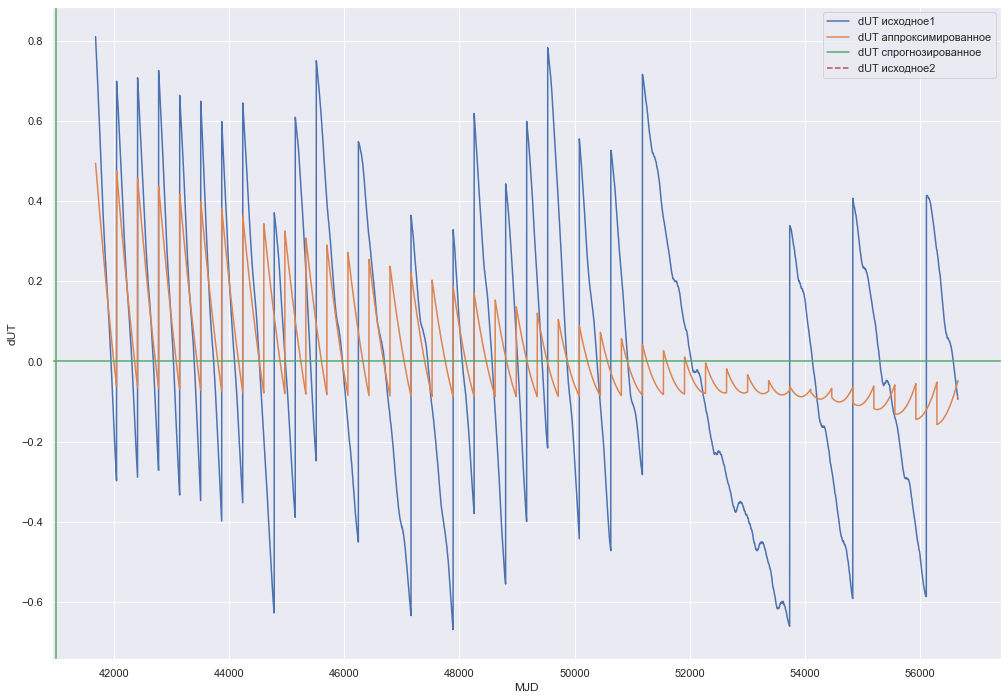

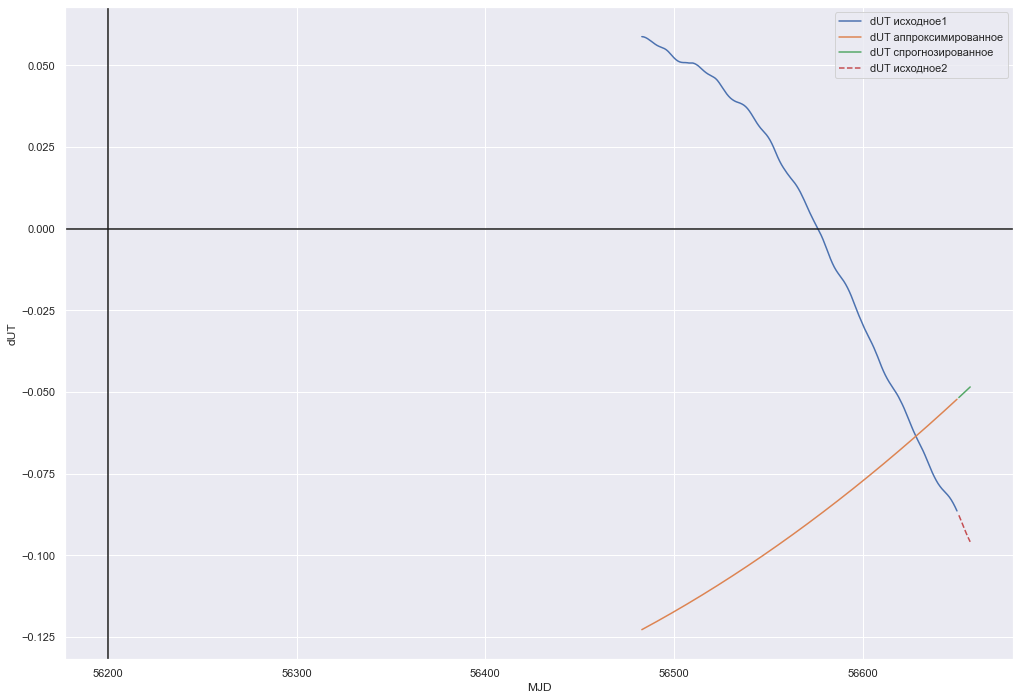

In [36]:
plt.figure(figsize=(17,12))
plt.figure(1,2)
plt.plot(x_train_dut7['MJD'], y_train_dut7, label = 'dUT исходное1')
plt.plot(x_train_dut7['MJD'], y_dut_7_train_prediction, label = 'dUT аппроксимированное')
plt.plot(x_test_dut7['MJD'], y_dut_7_test_prediction, label = 'dUT спрогнозированное')
plt.plot(x_test_dut7['MJD'],  y_test_dut7 ,'--', label = 'dUT исходное2')
plt.legend()

ax = plt.gca()
# plot X - axis    
ax.axhline(y=0, color='g')
# plot Y - axis    
ax.axvline(x=41000, color='g')
plt.xlabel("MJD")
plt.ylabel("dUT")

plt.figure(figsize=(17,12))
plt.plot(x_train_xp7['MJD'][14800:], y_train_dut7[14800:], label = 'dUT исходное1')
plt.plot(x_train_xp7['MJD'][14800:], y_dut_7_train_prediction[14800:], label = 'dUT аппроксимированное')
plt.plot(x_test_xp7['MJD'], y_dut_7_test_prediction, label = 'dUT спрогнозированное')
plt.plot(x_test_xp7['MJD'], y_test_dut7, '--r', label = 'dUT исходное2')
plt.legend()

axx = plt.gca()
# plot X - axis    
axx.axhline(y=0, color='k')
# plot Y - axis   
axx.axvline(x=56200, color='k')
plt.xlabel("MJD")
plt.ylabel("dUT")

In [ ]:
'''df_test = pd.DataFrame({"x_test": x_test_xp7.reshape(-1,), "y_x_test_pred": y_xp_7_test_prediction.reshape(-1,), "y_y_test_pred": y_yp_7_test_prediction(-1,)})
df_test.set_index("x_test", inplace=True)
df_test.to_excel("./filelast.xlsx")'''